In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using BenchmarkTools

using SciPy
using Statistics

using PyPlot

In [ ]:
"""function HR!(du, u, p, t)
    function sigma(x)
            return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    @inbounds begin
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    end
    return SVector{6}(du1, du2, du3,
                    du4, du5, du6)
end"""

In [2]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR!(du, u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du[1] = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du[2] = c - d * x1 ^2 - y1
    du[3] = r * ( s * ( x1 - xr ) - z1 )
    
    du[4] = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du[5] = c - d * x2 ^2 - y2
    du[6] = r * ( s * ( x2 - xr ) - z2 )
end

HR! (generic function with 1 method)

In [15]:
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(0,4,5000000)]
    pdf = ee_counter ./ length(spikes)
    return range(0,4,5000000), pdf
end

CALCPDF (generic function with 1 method)

In [26]:
tspan = (0.0, 2000000.0)

a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01 # 0.01
s = 5.
I = 4.
xv = 2.

k1= -0.17
k2 = k1
k = 0.0


#p = [a, b, c, d,
        # s, xr, r, I, xv, k1, k2, k]

0.0

In [4]:
prob = ODEProblem(HR!,  [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0], tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 300000.0)
u0: 6-element Vector{Float64}:
 -1.5
  0.0
  0.0
 -2.5
  0.0
  0.0

In [6]:
@btime sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)

  18.824 s (58154021 allocations: 5.53 GiB)


retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 4153846-element Vector{Float64}:
      0.0
      0.008386242154694615
      0.013571330831699325
      0.021048939703750453
      0.028015235514662267
      0.03627483634383015
      0.04496806740972965
      0.054773572468888025
      0.06549369924757126
      0.07746018997199591
      0.09072782928294482
      0.10555152188820723
      0.12214424036582144
      ⋮
 299998.9954653054
 299999.0889595415
 299999.1819814839
 299999.2745514698
 299999.3666872643
 299999.4584068711
 299999.5497265352
 299999.64066312305
 299999.73123157315
 299999.8214477883
 299999.9113263012
 300000.0
u: 4153846-element Vector{Vector{Float64}}:
 [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 [-1.3891045545952143, -0.07866956247731106, 6.568629613258373e-5, -2.218334991431103, -0.2230642561521325, -0.0003157125892680841]
 [-1.3272160205630454, -0.120768737149097, 0.00012847889704607356

In [5]:
@btime sol = solve(prob, Vern9(), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)

  16.055 s (49846224 allocations: 5.37 GiB)


retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 4153846-element Vector{Float64}:
      0.0
      0.008386242154694615
      0.013571330831699325
      0.021048939703750453
      0.028015235514662267
      0.03627483634383015
      0.04496806740972965
      0.054773572468888025
      0.06549369924757126
      0.07746018997199591
      0.09072782928294482
      0.10555152188820723
      0.12214424036582144
      ⋮
 299998.9954653054
 299999.0889595415
 299999.1819814839
 299999.2745514698
 299999.3666872643
 299999.4584068711
 299999.5497265352
 299999.64066312305
 299999.73123157315
 299999.8214477883
 299999.9113263012
 300000.0
u: 4153846-element Vector{Vector{Float64}}:
 [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 [-1.3891045545952143, -0.07866956247731106, 6.568629613258373e-5, -2.218334991431103, -0.2230642561521325, -0.0003157125892680841]
 [-1.3272160205630454, -0.120768737149097, 0.00012847889704607356, -2.0761469600574887, -0.335811931531609, -0.00045712940783

In [6]:
@btime sol = solve(prob, Vern9(), abstol = 1e-11, reltol = 1e-11, dense = false, maxiters = 10000000)

  5.006 s (4153916 allocations: 518.40 MiB)


retcode: Success
Interpolation: 1st order linear
t: 4153846-element Vector{Float64}:
      0.0
      0.008386242154694615
      0.013571330831699325
      0.021048939703750453
      0.028015235514662267
      0.03627483634383015
      0.04496806740972965
      0.054773572468888025
      0.06549369924757126
      0.07746018997199591
      0.09072782928294482
      0.10555152188820723
      0.12214424036582144
      ⋮
 299998.9954653054
 299999.0889595415
 299999.1819814839
 299999.2745514698
 299999.3666872643
 299999.4584068711
 299999.5497265352
 299999.64066312305
 299999.73123157315
 299999.8214477883
 299999.9113263012
 300000.0
u: 4153846-element Vector{Vector{Float64}}:
 [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 [-1.3891045545952143, -0.07866956247731106, 6.568629613258373e-5, -2.218334991431103, -0.2230642561521325, -0.0003157125892680841]
 [-1.3272160205630454, -0.120768737149097, 0.00012847889704607356, -2.0761469600574887, -0.335811931531609, -0.00045712940783740916]
 [-1.24541741981

In [5]:
@btime sol = solve(prob, Vern9(), abstol = 1e-11, reltol = 1e-11, save_everystep=false, maxiters = 10000000)

  4.121 s (46 allocations: 14.42 KiB)


retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
      0.0
 300000.0
u: 2-element Vector{Vector{Float64}}:
 [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 [-0.8255356616016085, -2.6182636680125158, 3.9594254472647616, -1.3530673704962162, -8.232516081046153, 3.7277973091865593]

In [5]:
@btime sol = solve(prob, Vern9(), abstol = 1e-11, reltol = 1e-11, dense = false, maxiters = 10000000)

  4.387 s (4149970 allocations: 517.98 MiB)


retcode: Success
Interpolation: 1st order linear
t: 4149900-element Vector{Float64}:
      0.0
      0.008386242154694615
      0.013571330831699325
      0.021048939703750453
      0.028015235514662267
      0.03627483634383015
      0.04496806740972965
      0.054773572468888025
      0.06549369924757126
      0.07746018997199591
      0.09072782928294482
      0.10555152188820723
      0.12214424036582144
      ⋮
 299999.0420524309
 299999.1336882075
 299999.22580637236
 299999.3183752549
 299999.41131941916
 299999.5044907093
 299999.59766955517
 299999.6905752946
 299999.78291230096
 299999.8744077116
 299999.9648310335
 300000.0
u: 4149900-element Vector{Vector{Float64}}:
 [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 [-1.3891045545952143, -0.07866956247731106, 6.568629613258373e-5, -2.218334991431103, -0.2230642561521325, -0.0003157125892680841]
 [-1.3272160205630454, -0.120768737149097, 0.00012847889704607356, -2.0761469600574887, -0.335811931531609, -0.00045712940783740916]
 [-1.245417419

In [3]:
using StaticArrays

In [4]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [27]:
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

12-element SArray{Tuple{12}, Float64, 1, 12} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.0

In [24]:
probsa = ODEProblem(HR, SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0], tspan, p)

ODEProblem with uType SArray{Tuple{6}, Float64, 1, 6} and tType Float64. In-place: false
timespan: (0.0, 5.0e6)
u0: 6-element SArray{Tuple{6}, Float64, 1, 6} with indices SOneTo(6):
 -1.5
  0.0
  0.0
 -2.5
  0.0
  0.0

In [25]:
sol = solve(probsa, Vern9(), abstol = 1e-11, reltol = 1e-11, dense=false, maxiters = 50000000)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase C:\Users\olenin.s\.julia\packages\SciMLBase\PYHXq\src\integrator_interface.jl:413


retcode: MaxIters
Interpolation: 1st order linear
t: 49333978-element Vector{Float64}:
 0.0
 0.008386242154694615
 0.013571330831699325
 0.021048941132108135
 0.028015304895238548
 0.0362744091035406
 0.04496809796410202
 0.054773355433143635
 0.06549349017945673
 0.07745969344735892
 0.09072708321435531
 0.10555155115972911
 0.12214442038982358
 ⋮
 3.569209532021273e6
 3.569209593325757e6
 3.5692096604514e6
 3.5692097240849626e6
 3.569209790056872e6
 3.5692098552019102e6
 3.569209922607991e6
 3.5692099921795917e6
 3.5692100620622057e6
 3.569210132482186e6
 3.569210196161126e6
 3.5692102550768848e6
u: 49333978-element Vector{SArray{Tuple{6}, Float64, 1, 6}}:
 [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 [-1.3891045545952143, -0.07866956247731106, 6.568629613258373e-5, -2.218334991431103, -0.2230642561521325, -0.0003157125892680841]
 [-1.3272160205630454, -0.120768737149097, 0.00012847889704607356, -2.0761469600574887, -0.335811931531609, -0.00045712940783740916]
 [-1.2454174049453786, -0.17400208

In [12]:
x_sum = sol[1,:][50000:end] + sol[4,:][50000:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)

2.3429399659875894

In [17]:
sel_, pdf_ = CALCPDF(spikes)

(0.0:8.00000160000032e-7:4.0, [0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057, 0.9285036653730057  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

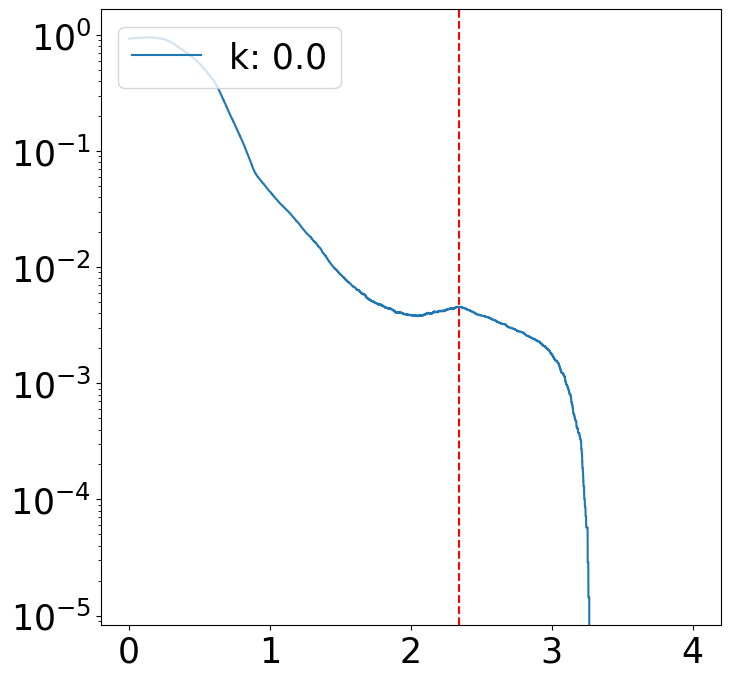

PyObject <matplotlib.legend.Legend object at 0x00000000671EDCA0>

In [18]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.0")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

In [28]:
ds_HR = ContinuousDynamicalSystem(HR,
    SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0],
    p )

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [29]:
spectrum = lyapunovspectrum(ds_HR, tspan[2]; diffeq = (alg = Vern9(),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 50000000
                                                            ))

6-element Vector{Float64}:
   0.014828140847039612
   0.005286721336494315
  -3.538206655667749e-6
  -0.027087747825470528
  -6.4178513211556725
 -11.539706310429617